# Synchronization of parametric with continuous AE recording

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from obspy import UTCDateTime

## Parametric data information

In [4]:
# Arguments for streams
folder = "data/Fatigue_INSA/"
files_name = "7075_APT_0.1_1"
files_ids = ["1","2","5","8","11","12"]
channel = "1"
files_suffix = "0-50"
channels = ["1","3"]

# Test information
material = "7075_APT-1"
stream_ref = "1-2-5-8-11-12"
if files_ids == ["E"]:
    sollicitation = "elastic"
elif files_ids == ["N"]:
    sollicitation = "noise"
else:
    sollicitation = "fatigue"
    stream_ref = files_ids[0]

# Arguments for parametric data
param_path = "Parametric_data/"+files_name

In [5]:
# merge Osbpy traces into a single stream
for i,c in enumerate(channels):
    datapath = folder+"Stream_"+files_name+"_"+files_ids[0]+"_ch"+c+"_"+files_suffix+".pkl"
    st = pickle.load(open(datapath,'rb'))
    # Stream header information
    st[0].stats.network = material
    st[0].stats.station = sollicitation
    st[0].stats.location = stream_ref
    st[0].stats.channel = "ch"+c
    if i == 0:
        stream = st
    else:
        stream += st


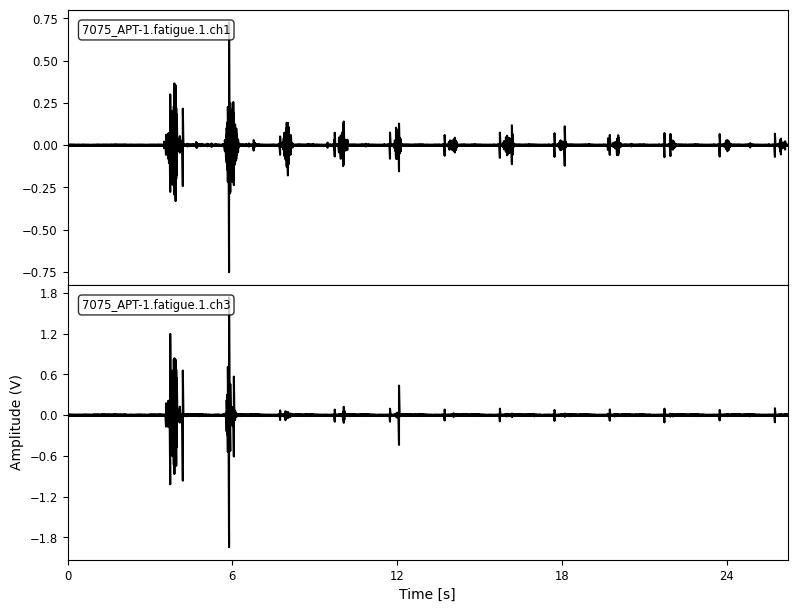

In [6]:
fig = plt.figure(figsize=(8,6))
stream.plot(fig=fig,type='relative',number_of_ticks=10,equal_scale=False,size=(1200,1200),outfile="/home/delaselt/Documents/Acoustic_mining/Fatigue_INSA/"+files_name+"/Stream_"+files_name+"_"+files_ids[0]+"_4ch_"+files_suffix+".svg")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude (V)")
plt.show()